# Importing the Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from pandas import concat

In [44]:
import functions as f

### Functions

## Preparing the Data

In [45]:
df = pd.read_csv("datasets/csvs-old/Seq_ETH.csv")
pos_df = df.drop(['v_x', 'v_y'], axis = 1)
pos_grp = pos_df.groupby('pedestrian_ID')

In [50]:
pos_df

,frame_number,pedestrian_ID,pos_x,pos_y
0,77,1,8.456844,3.588066
1,78,1,9.125530,3.658583
2,79,1,9.787146,3.849445
3,79,1,10.472197,3.955450
4,80,1,11.066000,4.061280
...,...,...,...,...
8903,1238,357,10.449366,6.229233
8904,1238,367,11.201661,8.443910
8905,1238,366,12.132311,6.984982
8906,1238,364,12.369087,4.146375


17
360


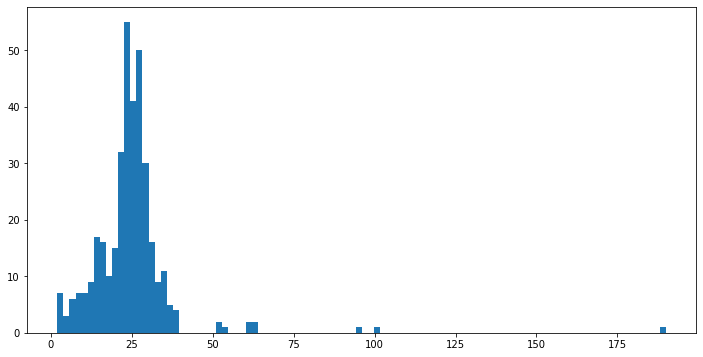

In [24]:
length = []
for name, group in pos_grp:
    length.append(len(group))

plt.figure(figsize=(12, 6))
plt.hist(length, bins = 100)

newL = [x for x in length if x < 9]
print(len(newL))
print(len(length))

In [25]:
df1 = df.copy()
for name, group in pos_grp:
    if len(group) < 9:
        df1 = df1.drop(pos_grp.get_group(name).index)

pos_df1 = df1.drop(['v_x', 'v_y'], axis = 1)
pos_grp1 = pos_df1.groupby('pedestrian_ID')

0
343


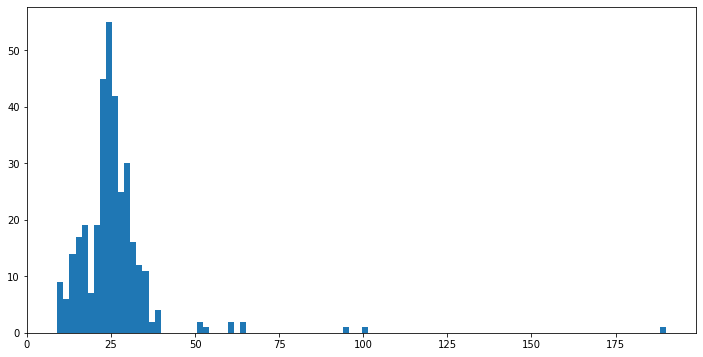

In [26]:
length = []
for name, group in pos_grp1:
    length.append(len(group))

plt.figure(figsize=(12, 6))
plt.hist(length, bins = 100)

# newL = [x for x in length if x < 7]
# print(len(newL))
# print(len(length))

In [55]:
df_lstm = pd.DataFrame()
for name, group in pos_grp1:
    first_cols = group[['frame_number', 'pedestrian_ID']]
    second_cols = group[['pos_x', 'pos_y']]
    second_cols_converted = f.series_to_supervised(second_cols, 4, 4)
    
    # df_temp = pd.concat([first_cols, second_cols_converted], axis=1)
    df_lstm = pd.concat([df_lstm, second_cols_converted])
    
df_lstm = df_lstm.dropna()
# df_lstm = df_lstm.drop(['frame_number', 'pedestrian_ID'], axis = 1)
# df_lstm.to_csv(f"datasets/csvs/lstms/seq_eth.csv", index=False)

## Models

In [56]:
df_lstm

,var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t),var1(t+1),var2(t+1),var1(t+2),var2(t+2),var1(t+3),var2(t+3)
11,13.017548,5.782591,12.087770,5.751949,11.746306,5.729815,11.175158,5.836247,10.434290,5.873203,10.050254,6.171487,9.571296,6.237355,9.084074,6.263836
13,12.087770,5.751949,11.746306,5.729815,11.175158,5.836247,10.434290,5.873203,10.050254,6.171487,9.571296,6.237355,9.084074,6.263836,8.552751,6.374027
15,11.746306,5.729815,11.175158,5.836247,10.434290,5.873203,10.050254,6.171487,9.571296,6.237355,9.084074,6.263836,8.552751,6.374027,8.097887,6.481037
19,11.175158,5.836247,10.434290,5.873203,10.050254,6.171487,9.571296,6.237355,9.084074,6.263836,8.552751,6.374027,8.097887,6.481037,7.635367,6.548341
24,10.434290,5.873203,10.050254,6.171487,9.571296,6.237355,9.084074,6.263836,8.552751,6.374027,8.097887,6.481037,7.635367,6.548341,7.167091,6.616482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910
8864,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910
8872,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910
8879,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910,11.201661,8.443910


In [57]:
X = df_lstm.iloc[:,:8].values
y = df_lstm.iloc[:,8:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4501, 1, 8) (4501, 8) (1930, 1, 8) (1930, 8)


In [58]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
verbose, epochs, batch_size = 2, 50, 16

In [63]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(32),

    tf.keras.layers.Dense(8)
])
model1.summary()

# model1.compile(loss='mae', optimizer='adam', metrics='acc')

# history1 = model1.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_test, y_test), verbose=verbose, shuffle=False)


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 1, 32)             5248      
_________________________________________________________________
lstm_21 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 264       
Total params: 13,832
Trainable params: 13,832
Non-trainable params: 0
_________________________________________________________________


In [64]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(32),

    tf.keras.layers.Dense(8)
])

model.compile(loss='mae', optimizer='adam', metrics='acc')

history = model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_test, y_test), verbose=verbose, shuffle=False)


Epoch 1/5
282/282 - 22s - loss: 2.8199 - acc: 0.2862 - val_loss: 1.3367 - val_acc: 0.4933
Epoch 2/5
282/282 - 6s - loss: 0.9603 - acc: 0.5803 - val_loss: 0.6811 - val_acc: 0.6212
Epoch 3/5
282/282 - 7s - loss: 0.5270 - acc: 0.6519 - val_loss: 0.3874 - val_acc: 0.6554
Epoch 4/5
282/282 - 7s - loss: 0.3484 - acc: 0.6645 - val_loss: 0.3143 - val_acc: 0.6731
Epoch 5/5
282/282 - 6s - loss: 0.2759 - acc: 0.6807 - val_loss: 0.2521 - val_acc: 0.6927


c:\Users\lauki\anaconda3\envs\tfgpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\lauki\anaconda3\envs\tfgpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


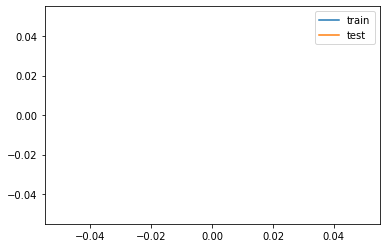

In [67]:
sns.lineplot(history.history['loss'], label='train')
sns.lineplot(history.history['val_loss'], label='test')
# plt.legend()
sns.show()

In [79]:
pd.DataFrame(history.history)[['loss', 'val_loss']]

,loss,val_loss
0,2.819928,1.336726
1,0.960289,0.681055
2,0.527029,0.387413
3,0.348376,0.314335
4,0.275950,0.252135


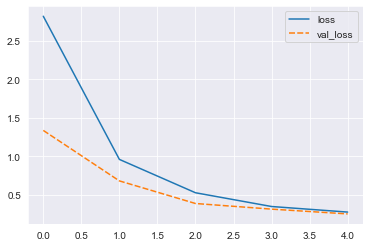

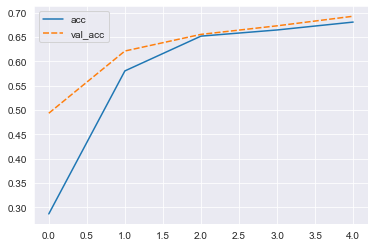

In [83]:
sns.lineplot(data=pd.DataFrame(history.history)[['loss', 'val_loss']])
plt.show()
sns.lineplot(data=pd.DataFrame(history.history)[['acc', 'val_acc']])
plt.show()

### Prediction

In [58]:
y_pred = []
for val in X_test:
    pred = model.predict(val[np.newaxis])
    y_pred.append(pred)

print(tf.keras.metrics.mean_absolute_error(y_pred, y_test).numpy())

[[0.03322618 1.26998856 1.47109964 ... 2.38018962 2.44699327 1.41535632]
 [1.28255814 0.11970422 0.4587997  ... 3.66221888 3.72902253 2.69738558]
 [1.4629079  0.56398943 0.01451448 ... 3.84256865 3.9093723  2.87773535]
 ...
 [2.39573989 3.66625733 3.86736841 ... 0.03502897 0.08987312 2.17478083]
 [2.44784621 3.71836365 3.91947473 ... 0.06818547 0.03894446 2.22570949]
 [1.38084517 2.6513626  2.85247369 ... 2.20235184 2.25719599 0.03398228]]


In [81]:
y_pred[0][0][0]

-0.055778347

#### Error

In [64]:
error = tf.keras.metrics.MeanAbsoluteError()
error.update_state(y_pred, y_test)
error.result().numpy()

3.0323954

## Forcasting

In [182]:
def make_forecast(model, df, size_of_prediction=2, window_size=3):
  """
  Makes the forecast on the data

  Args:
    model (tensorflow sequential) -- the trained model with 2 output tensors
    df (pandas dataframe) -- the part of the dataframe on which the predictions are to be made
    size_of_prediction (int) -- dimension of the prediction
    window_size (int) -- size of the window
  """

  series = []
  forecasts = []
  len_of_df = len(df)

  try:
    for i in range(window_size):
      for j in range(size_of_prediction):
        series.append(df.iloc[i][j])
  except IndexError:
    print(f"Length of the dataframe={len(df)} is smaller than the window_size={window_size}. Add more data or reduce the window_size")

  for i in range(len_of_df-window_size):
    predict = np.array(series[-window_size*size_of_prediction:])[np.newaxis]
    forecast = model.predict(predict[-window_size*size_of_prediction:][np.newaxis])
    forecasts.append(forecast[0])
    for j in range(size_of_prediction):
      series.append(forecast[0][j])

  return np.array(forecasts)
      

In [186]:
def draw_predictions(df, forecasts):
    """
    Draws the predictions of the data

    Args:
    df (pandas dataframe) -- the part of the dataframe on which the predictions are to be made
    forecasts (array of int) -- all the predictions from make_forecast()
    """
    x_val = [val[0] for val in forecasts]
    y_val = [val[1] for val in forecasts]

    b = plt.scatter(np.array(df.iloc[:3,0]), np.array(df.iloc[:3,1]), c='b')
    c = plt.scatter(np.array(df.iloc[3:,0]), np.array(df.iloc[3:,1]), c='c')
    o = plt.scatter(x_val, y_val, c='orange')
    plt.legend((b, c, o), ('before', 'after', 'prediction'))
    plt.show()

In [ ]:
i = 15
for name, group in pos_grp1:
    group = group.iloc[:,-2:]
    forecasts = make_forecast(model, group)
    draw_predictions(group, forecasts)
    print(group)
    i -= 1
    if not i:
        break

# TEST

In [189]:
def future_forecast(model, df, size_of_prediction=2, window_size=3, no_of_forecasts=3):
  """
  Makes the forecast on the data

  Args:
    model (tensorflow sequential) -- the trained model with 2 output tensors
    df (pandas dataframe) -- the part of the dataframe on which the predictions are to be made
    dim (int) -- dimension of the prediction
    window_size (int) -- size of the window
    no_of_forecasts (int) -- number of forecasts to be made, the forecasts made would also be used to make the later forecasts
  """

  series = []
  forecasts = []
  len_of_df = len(df)

  try:
    for i in range(window_size):
      for j in range(size_of_prediction):
        series.append(df.iloc[i][j])
  except IndexError:
    print(f"Length of the dataframe={len(df)} is smaller than the window_size={window_size}. Add more data or reduce the window_size")

  for i in range(no_of_forecasts):
    predict = np.array(series[-window_size*size_of_prediction:])[np.newaxis]
    forecast = model.predict(predict[-window_size*size_of_prediction:][np.newaxis])
    forecasts.append(forecast[0])
    for j in range(size_of_prediction):
      series.append(forecast[0][j])

  return np.array(forecasts)

In [192]:
future_forecast(model, group)

array([[0.6184893, 2.9211946],
       [0.6327673, 3.2772484],
       [0.6006485, 3.5886047]], dtype=float32)

In [193]:
group

,pos_x,pos_y
223,0.364292,1.678611
226,0.445974,2.107313
229,0.585037,2.545277
232,0.611068,3.001580
